#MNIST Digit Classification with TensorFlow Keras API

**A Deep Learning Project for Handwritten Digit Recognition**

Through this project, my aim is to build a neural network to classify handwritten digits from number 0 to 9.

To train the model, I will be using MNIST dataset and opensource frameworks such as TensorFlow with Keras - API.


> The MNIST dataset is a publicly available dataset which is a classic benchmark in computer vision, consisting of 60,000 training images and 10,000 test images of handwritten digits.

Our approach involves the following steps:

**Table of Content**

1. Problem Overview
2. Dataset loading, Initial exploration and visualization
3. Data Preprocessing
3. Model Architecture
4. Training Process
5. Evaluation
6. Result visualization
7. Conclusion

## 1. Problem overview

We aim to build a simple digit recognition and classification model using keras and simple neural network. We aim to achieve a accurury higher than 95% for digit classification.


##2. Dataset loading and Initial exploration

The data used for this project is the MNIST (Modified National Institute of Standards and Technology) dataset first released in 1999. The MNIST dataset contains 70,000 grayscale images (28×28 pixels) of handwritten digits (0-9), split into:


*   60,000 training images
*   10,000 test images

This data is also available on Kaggle - https://www.kaggle.com/datasets/hojjatk/mnist-dataset


> The MNIST dataset is loaded directly from Keras datasets, which provides pre-split training and test sets in NumPy array format. For comprehensive analysis, we convert these arrays into Pandas DataFrames.



In [39]:
import pandas as pd
import numpy as np
from tensorflow.keras.datasets import mnist

# Load MNIST data (returns NumPy arrays)
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Convert to Pandas DataFrames for analysis
train_df = pd.DataFrame({
    'label': train_labels,
    'image': list(train_images)  # Store each 28x28 image as a list
})

test_df = pd.DataFrame({
    'label': test_labels,
    'image': list(test_images)
})

2b.  Data visualization

**Dataset Composition**

The label distributions across training and test sets confirm the dataset is balanced. Key observations:

*   Training Set (60,000 samples) - All digits (0-9) are represented with approximately 5,400–6,700 samples per class. Digit "1" shows the highest representation (6,742 samples), while digit "5" is least frequent (5,421 samples)

*   Test Set (10,000 samples) - Maintains proportional representation at ≈10% of training set size per class

In [40]:
print("Train Label Distribution:")
print(train_df['label'].value_counts().sort_index())

print("\nTest Label Distribution:")
print(test_df['label'].value_counts().sort_index())

Train Label Distribution:
label
0    5923
1    6742
2    5958
3    6131
4    5842
5    5421
6    5918
7    6265
8    5851
9    5949
Name: count, dtype: int64

Test Label Distribution:
label
0     980
1    1135
2    1032
3    1010
4     982
5     892
6     958
7    1028
8     974
9    1009
Name: count, dtype: int64


Same can be visulaized using a Bar graph

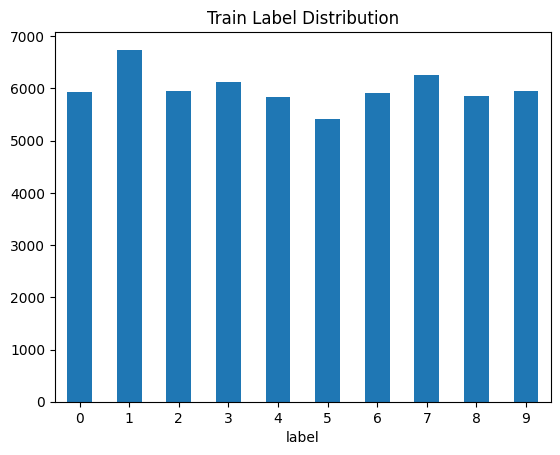

In [41]:
import matplotlib.pyplot as plt

train_df['label'].value_counts().sort_index().plot(kind='bar', title='Train Label Distribution')
plt.xticks(rotation=0)
plt.show()

 Sample Digit Representation

 > First, let‘s visualize digit samples from our dataset.

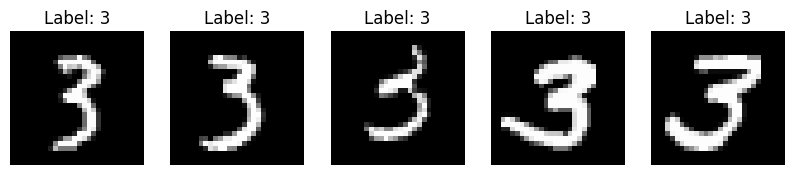

In [42]:
# Display sample images
sample = train_df[train_df['label'] == 3].sample(5)  # this will help to get any 5 random '3's

plt.figure(figsize=(10, 3))
for i, (_, row) in enumerate(sample.iterrows()):
    plt.subplot(1, 5, i+1)
    plt.imshow(row['image'], cmap='gray')
    plt.title(f"Label: {row['label']}")
    plt.axis('off')
plt.show()

This is how each digit label as 3 will look like in a 28 X 28 matrix

In [43]:
sample_3 = train_df[train_df['label'] == 3]  # this will give us a 28 X 28 matrix of a sample train digit
print(sample_3)

       label                                              image
7          3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
10         3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
12         3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
27         3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
30         3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
...      ...                                                ...
59961      3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
59964      3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
59978      3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
59980      3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...
59996      3  [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...

[6131 rows x 2 columns]


This is how one label 3 digit looks like as a numpy array

In [44]:
print(sample_3.iloc[0]['image'])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  38  43 105 255 253 253 253
  253 253 174   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0  43 139 224 226 252 253 252 252 252
  252 252 252 158  14   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 178 252 252 252 252 253 252 252 252
  252 252 252 252  59   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 109 252 252 230 132 133 13

Well, these numbers are just vector representation of a image.

Machines only understand images when they are converted to numbers, based on how bright each pixel is.

> For a grayscale image, the most dim pixels are represented as 0.0, while the brightest pixels are represented as 0.256.



Lets try to visualize these numbers in a more human-friendly way (as a actual image). Here we will taking a random entry from the train images.

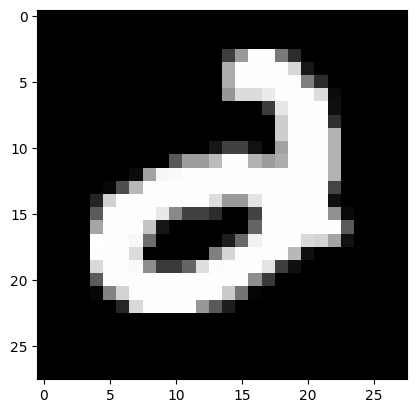

In [45]:
# first, let‘s generate a random number with numpy random, so everytime we get a different image
random_nr = np.random.randint(0, 60000)

# now, let‘s use imshow() to visualize the random number from our train dataset
plt.imshow(train_images[random_nr], cmap="gray");

Interesting, let‘s visualize one example per each digit 0-9

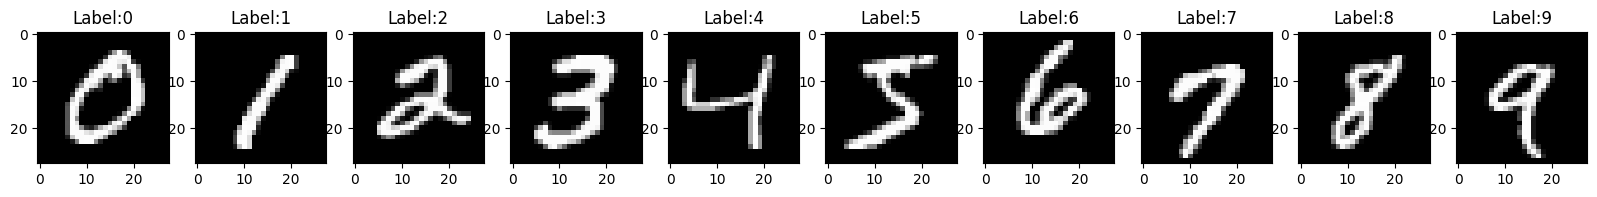

In [46]:
num_classes = 10

# Create a subplot
fig, ax = plt.subplots(1, num_classes, figsize=(20,20)) # 1 row, 10 columns (num_classes)

# Loop through 10 classes from train dataset and add labels
for i in range(num_classes):
  # Find an image with the current class label
  sample_index = np.where(train_labels == i)[0][0] # Find the index of the first image with label i
  sample = train_images[sample_index]  # Get the image using the index
  ax[i].imshow(sample, cmap="gray")
  ax[i].set_title(f"Label:{i}")

Data Preprocessing for Model Input

> Array Conversion and Normalization
The dataset undergoes critical transformations to prepare it for neural network processing:

* Structure Conversion:

Pandas DataFrames are converted back to NumPy arrays, the expected format for TensorFlow operations. Image data is reshaped to include explicit channel dimension (28×28×1) required by convolutional layers

* Normalization:

Pixel values are scaled to [0, 1] range by dividing by 255.0. This mitigates numerical instability during training



In [47]:
# Convert back to NumPy arrays
X_train = np.array(train_df['image'].tolist()).reshape(-1, 28, 28, 1) / 255.0
y_train = train_df['label'].values

X_test = np.array(test_df['image'].tolist()).reshape(-1, 28, 28, 1) / 255.0
y_test = test_df['label'].values

Note - Since the images are grayscale, we are using using 1 as channel. If the figures would be RGB, it would use 3. (batch_size, height, width, channels)

> Before reshape: [ [row1], [row2], ... [row28] ]  # 2D matrix.

> After reshape: [ [ [row1], [row2], ... [row28] ] ]  # 3D tensor with channel

#3. Model Architecture

Now it‘s time to build our first neural network!

For this project, we will build a simple fully connected neural network which consists of a serious of layers in which every neuron in one layer is connected to every neuron in the other layer.


> The main advantage of fully connected neural networks is that they can be used for a broad range of pattern recognition tasks. Compared to more "specialized" artificial networks, such as CNN or RNN, however, they tend to perform worse for specific problems.


In [48]:
!pip install tensorflow
import tensorflow as tf
from tensorflow import keras

Here, we will try to deploy a sequential model where the model will be made by stacking layers in a particular sequence.

> There are 3 types of layers in a neural network: an input layer, a hidden layer(s), and an output layer. In our case, we will create a simple neural network with 1 input layer, 1 hidden layer and 1 output layer.

Some importnat parameters to discuss:

1. Activation functions -
Each layer in a neural network has an activation function. It tells each neuron how to transform the data it has, before sending it to the next layer. The most common activation function for hidden layers is ReLU, sigmoid, and tanh. As we are dealing with numbers, applying ReLU for hidden layer activation would be preferable.

2. Activation function for output -
The most common activation functions for the output layer are linear, logistic (sigmoid), and softmax. Since, our problem is a multi-classification, we would be using softmax for output layer.

In [49]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten 28x28 images to 1D array
    keras.layers.Dense(128, activation='relu'),   # Hidden layer with 128 neurons
    keras.layers.Dense(10, activation='softmax') # Output layer for 10 digits (0-9)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


That‘s it!

To complie the model, we would need loss and optimizer functions

Adam is an adaptive optimization algorithm that combines the benefits of two other optimizers. Momentum: Accelerates training by using moving averages of gradients (like a "ball rolling downhill"). RMSProp: Adapts the learning rate for each parameter based on the average of recent gradient magnitudes.

For each parameter (weight/bias) in the neural network, Adam: Computes Gradients: Measures how much each parameter contributed to the error (loss) using backpropagation. Updates Moments: First moment (m): Moving average of gradients. Second moment (v): Moving average of squared gradients and then adjusts parameters such as learing rate etc.

In [50]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Batches per epoch = Total samples / Batch size

60,000 / 32 = 1,875 batches  

Epochs - When all data we have has updated the internal parameters, that equals to one epoch. There are many strategies to chose the best number of epochs.

 But the best way to decide if you have too many or too little epochs is to look at the model perofrmance. If the model keeps improving, it is advisable to try a higher numebr of epochs. If the model stopped improving way before the final epoch, it is advisable to try a lower number of epochs.

In [51]:
# Train the model
my_model = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8159 - loss: 6.8186 - val_accuracy: 0.8870 - val_loss: 0.5070
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9021 - loss: 0.3999 - val_accuracy: 0.9037 - val_loss: 0.4206
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9272 - loss: 0.2861 - val_accuracy: 0.9262 - val_loss: 0.3351
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9345 - loss: 0.2463 - val_accuracy: 0.9429 - val_loss: 0.2392
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9428 - loss: 0.2216 - val_accuracy: 0.9312 - val_loss: 0.2694
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9461 - loss: 0.2080 - val_accuracy: 0.9442 - val_loss: 0.2725
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9480 - loss: 0.2064 - val_accuracy: 0.9389 - val_loss: 0.2705
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9520 - loss: 0.1852

Now, we will test accuracy of our model by comparing the predicted value and the actual value of the test data

#6. Evaluation

Now that we have compiled and fitted our model, it is time to evaluate its performance. Since it is a classification problem, we can use the typical classification evaluation tools, such as accuracy, and loss. Similarly to machine learning problems, we evaluate the model on test data - the data that our algorithm hasn‘t seen yet. If we want to compare test data evaluation with train data performance, we can also see both.

In [52]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 1s - 3ms/step - accuracy: 0.9474 - loss: 0.2632

Test accuracy: 0.9473999738693237


Here, verbose is just the output style (verbose= 1)

In [53]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print(f'\nTest accuracy: {test_acc}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9416 - loss: 0.2912

Test accuracy: 0.9473999738693237


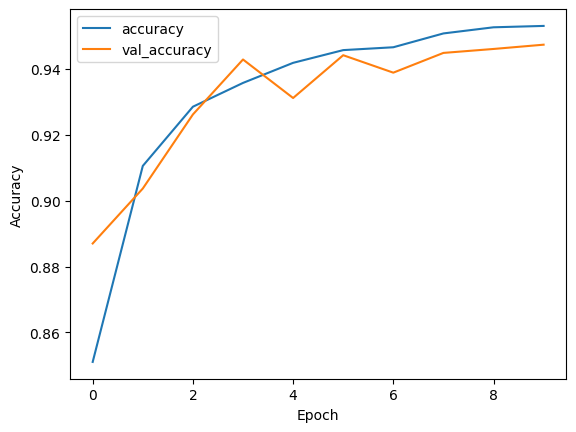

In [54]:
plt.plot(my_model.history['accuracy'], label='accuracy')
plt.plot(my_model.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Now, we can deploy this model, to make predictions on new data of your choice.

Now that we trained and evaluated out model, let‘s try making predictions! Softmax activation function that we used for our output layer returns the predictions as a vector of probabilities. For example, "this image is 86% likely to be number 7, and this image has a 14% probability of being number 2."

In [55]:
# Make predictions
predictions = model.predict(test_images)

predictions_classes = np.argmax(predictions, axis=1) # pick the highest probability with "np.argmax()", and turn it into an index uing "axis=1"

print(f"Predicted class for first test image: {tf.argmax(predictions[0])}")
print(f"Actual class: {test_labels[7999]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
Predicted class for first test image: 7
Actual class: 8


Lets, try to see if our giving the right predicitions using random 25 images. Also we would colour right predicitions as green and wrong as red.

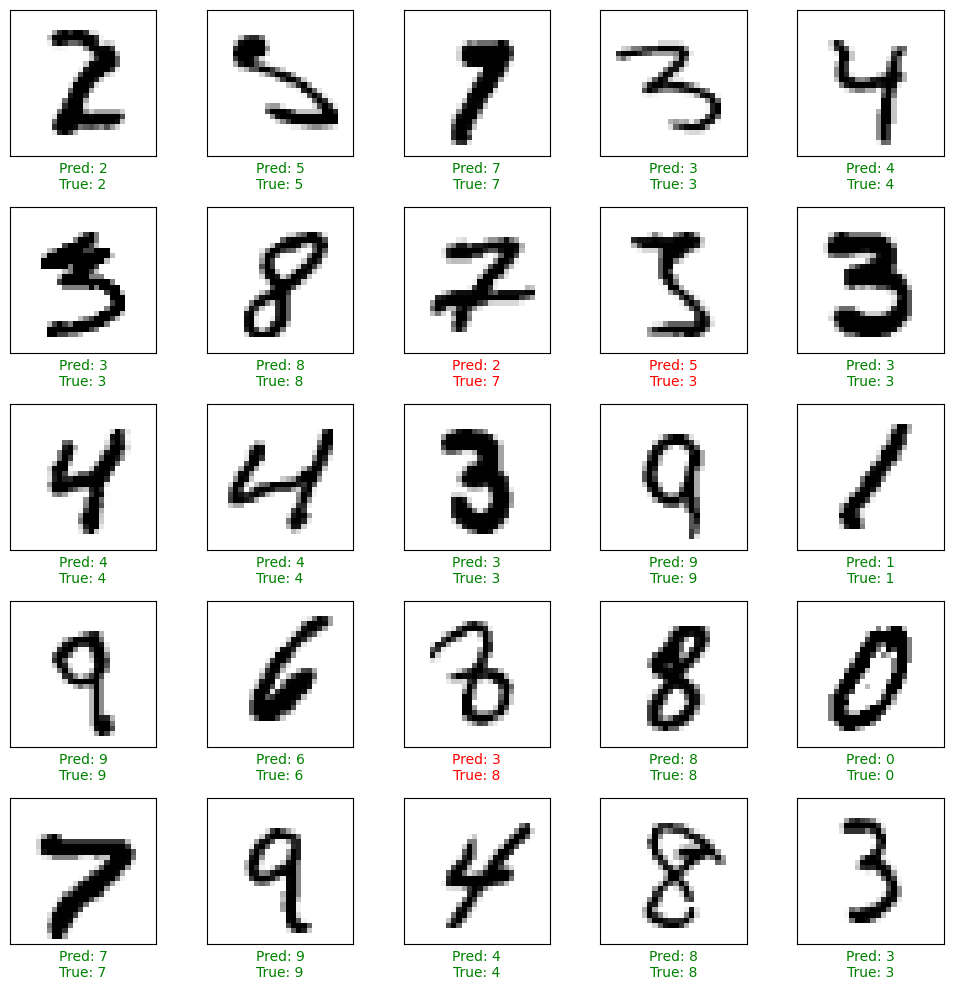

In [56]:
plt.figure(figsize=(10,10))
for i in range(25):
    idx = np.random.randint(0, len(test_images))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[idx], cmap=plt.cm.binary)

    # Green = correct, Red = wrong
    predicted_label = np.argmax(predictions[idx]) # Get the predicted label with highest probability
    color = 'green' if predicted_label == test_labels[idx] else 'red' # Compare predicted label to true label
    plt.xlabel(f"Pred: {predicted_label}\nTrue: {test_labels[idx]}", color=color)
plt.tight_layout()
plt.show()

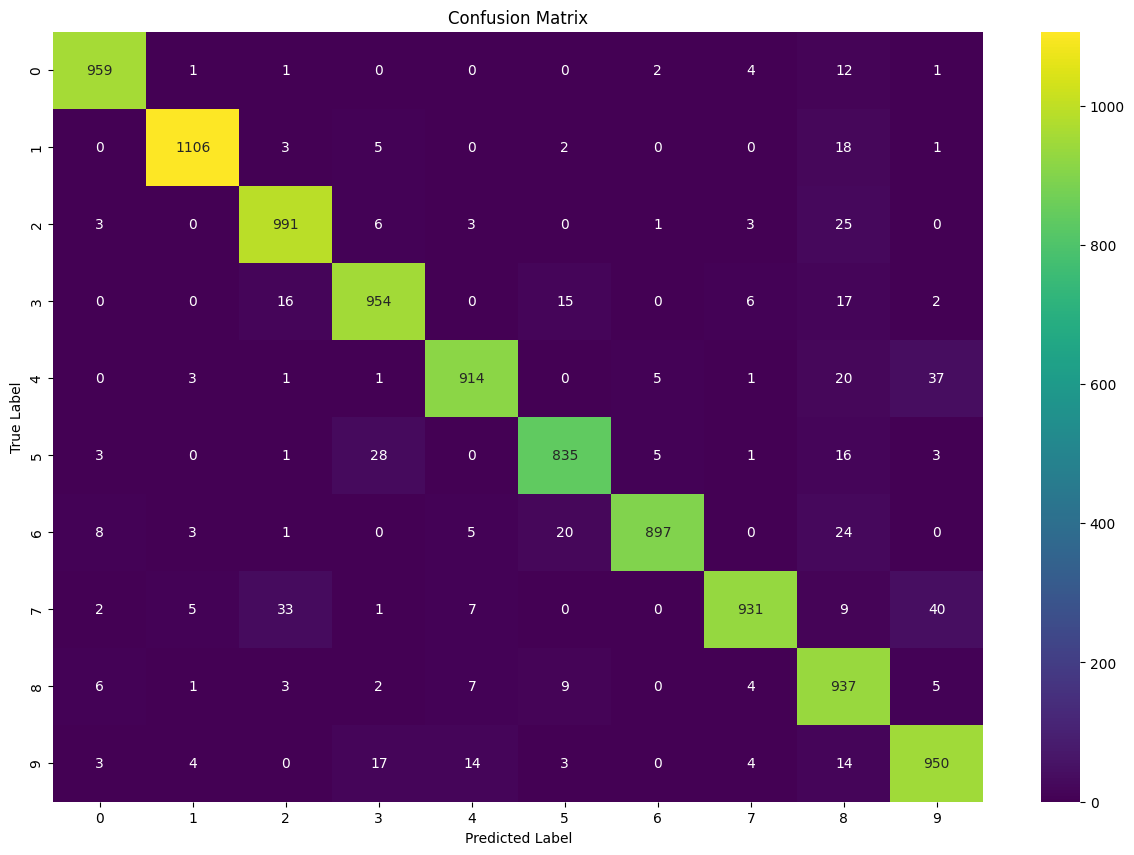

In [57]:
# generate a confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
confusion_mtx = confusion_matrix(test_labels, predictions_classes)

# visualize confusion matrix with matplotlib and seaborn
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix");

#7. Conclusion

As we can see, our model performed pretty well (94.6%) and the absolute majority of the labels were correct. In this project, we learned how to create a simple neural network, about the types of the layers, activation and loss functions, and optimizers. We also learned how to pre-process images through normalization, and how to evaluate our model after fitting it with accuracy and confusion matrix.

For future, we will try to fit in different types of neural networks such as CNN to increase the accuruacy of our model.